In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading all csv files

In [ ]:
# Reading all the fetched data files

target_data = pd.read_csv("D:\\MSIS\\DMDD\\metasearch-engine-for-groceries\\Data\\Target_Products.csv")
star_data = pd.read_csv("D:\\MSIS\\DMDD\\metasearch-engine-for-groceries\\Data\\Star_Products.csv")
walmart_data = pd.read_csv("D:\\MSIS\\DMDD\\metasearch-engine-for-groceries\\Data\\Walmart_Products.csv")
traderJoes_data = pd.read_csv("D:\\MSIS\\DMDD\\metasearch-engine-for-groceries\\Data\\TraderJoes_Products.csv")
walgreens_data = pd.read_csv("D:\\MSIS\\DMDD\\metasearch-engine-for-groceries\\Data\\Walgreens_Products.csv")

## Audit Validity for Target Data

In [7]:
target_data.head(3)

,Unnamed: 0,product_ids,product_title,product_url,vendor_ids,price,eligibility_rules,oos_all_store,availability_shipping,shipping_min_date,shipping_max_date,two_days_shipping_availability,store_ids,store_names,pickup_availability,pickup_date,delivery_availability
0,0,12964744,Kleenex Ultra Soft Facial Tissue - 4pk/60ct,https://www.target.com/p/kleenex-ultra-soft-fa...,2919050,6.19,{},False,IN_STOCK,2022-12-09,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
1,1,11276157,Claritin Allergy Relief 24 Hour Non-Drowsy Lor...,https://www.target.com/p/claritin-allergy-reli...,"4164146,3378069",25.49,{},False,IN_STOCK,2022-12-08,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
2,2,11054785,Refresh Plus Preservative Free Lubricant Eye D...,https://www.target.com/p/refresh-plus-preserva...,1084782,26.99,{},False,IN_STOCK,2022-12-09,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK


In [11]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      106 non-null    int64  
 1   product_ids                     106 non-null    int64  
 2   product_title                   106 non-null    object 
 3   product_url                     106 non-null    object 
 4   vendor_ids                      106 non-null    object 
 5   price                           106 non-null    float64
 6   eligibility_rules               106 non-null    object 
 7   oos_all_store                   106 non-null    bool   
 8   availability_shipping           106 non-null    object 
 9   shipping_min_date               41 non-null     object 
 10  shipping_max_date               41 non-null     object 
 11  two_days_shipping_availability  41 non-null     object 
 12  store_ids                       106 

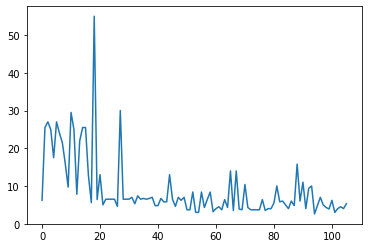

In [17]:
plt.plot(target_data["price"])

In [18]:
target_data.drop(columns = ["Unnamed: 0", "eligibility_rules"], inplace=True)
target_data.columns

Index(['product_ids', 'product_title', 'product_url', 'vendor_ids', 'price',
       'oos_all_store', 'availability_shipping', 'shipping_min_date',
       'shipping_max_date', 'two_days_shipping_availability', 'store_ids',
       'store_names', 'pickup_availability', 'pickup_date',
       'delivery_availability'],
      dtype='object')

In [19]:
# Data type conversion of columns
target_data['product_ids'] = target_data['product_ids'].astype(str)
target_data['store_ids'] = target_data['store_ids'].astype(str)

In [31]:
# Number of null values in each column
target_data.isnull().sum()


product_ids                        0
product_title                      0
product_url                        0
vendor_ids                         0
price                              0
oos_all_store                      0
availability_shipping              0
shipping_min_date                  9
shipping_max_date                 65
two_days_shipping_availability    65
store_ids                          0
store_names                        0
pickup_availability                0
pickup_date                       16
delivery_availability              0
dtype: int64

In [35]:
# Filling shipping min date
target_data['shipping_min_date'] = target_data[['shipping_min_date', 'shipping_max_date', 'pickup_date']].apply(lambda row: row['pickup_date'] if row['shipping_min_date']!= row['shipping_min_date'] and row['pickup_date']!=row['pickup_date'] else "NA", axis=1)

target_data['shipping_max_date'] = target_data[['shipping_min_date', 'shipping_max_date', 'pickup_date']].apply(lambda row: row['pickup_date'] if row['shipping_min_date']!= row['shipping_min_date'] and row['pickup_date']!=row['pickup_date'] else "NA", axis=1)

target_data[['two_days_shipping_availability']] = target_data[['two_days_shipping_availability']].fillna("False")

In [36]:
target_data.isnull().sum()

product_ids                        0
product_title                      0
product_url                        0
vendor_ids                         0
price                              0
oos_all_store                      0
availability_shipping              0
shipping_min_date                  9
shipping_max_date                  9
two_days_shipping_availability     0
store_ids                          0
store_names                        0
pickup_availability                0
pickup_date                       16
delivery_availability              0
dtype: int64

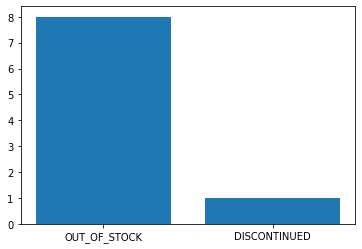

In [44]:
unique_statuses = list(target_data[target_data['shipping_min_date'].isna()]['availability_shipping'].unique())
records_with_no_dates = target_data[target_data['shipping_min_date'].isna()]['availability_shipping'].tolist()
records_with_no_dates

# Make a random dataset:
height = [records_with_no_dates.count(x) for x in unique_statuses]
bars = unique_statuses
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [45]:
target_data[['two_days_shipping_availability']] = target_data[['two_days_shipping_availability']].fillna("False")

In [47]:
target_data.to_csv("Target_Products_Cleaned.csv")

In [48]:
df = pd.read_csv("Target_Products.csv")

target_data['shipping_min_date'] = df['shipping_min_date']
target_data['shipping_max_date'] = df['shipping_max_date']



In [49]:
target_data.head()

,product_ids,product_title,product_url,vendor_ids,price,oos_all_store,availability_shipping,shipping_min_date,shipping_max_date,two_days_shipping_availability,store_ids,store_names,pickup_availability,pickup_date,delivery_availability
0,12964744,Kleenex Ultra Soft Facial Tissue - 4pk/60ct,https://www.target.com/p/kleenex-ultra-soft-fa...,2919050,6.19,False,IN_STOCK,2022-12-09,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
1,11276157,Claritin Allergy Relief 24 Hour Non-Drowsy Lor...,https://www.target.com/p/claritin-allergy-reli...,"4164146,3378069",25.49,False,IN_STOCK,2022-12-08,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
2,11054785,Refresh Plus Preservative Free Lubricant Eye D...,https://www.target.com/p/refresh-plus-preserva...,1084782,26.99,False,IN_STOCK,2022-12-09,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
3,13263274,Allegra 24 Hour Allergy Relief Tablets - Fexof...,https://www.target.com/p/allegra-24-hour-aller...,1654138,24.99,False,IN_STOCK,2022-12-08,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
4,15068149,Nasacort Allergy Relief Spray - Triamcinolone ...,https://www.target.com/p/nasacort-allergy-reli...,1654138,17.49,False,IN_STOCK,2022-12-09,"[[...], [...], [...], [...], [...], [...], [.....",False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK


In [50]:
target_data['shipping_max_date'] = df['pickup_date']

In [51]:
target_data.head()

,product_ids,product_title,product_url,vendor_ids,price,oos_all_store,availability_shipping,shipping_min_date,shipping_max_date,two_days_shipping_availability,store_ids,store_names,pickup_availability,pickup_date,delivery_availability
0,12964744,Kleenex Ultra Soft Facial Tissue - 4pk/60ct,https://www.target.com/p/kleenex-ultra-soft-fa...,2919050,6.19,False,IN_STOCK,2022-12-09,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
1,11276157,Claritin Allergy Relief 24 Hour Non-Drowsy Lor...,https://www.target.com/p/claritin-allergy-reli...,"4164146,3378069",25.49,False,IN_STOCK,2022-12-08,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
2,11054785,Refresh Plus Preservative Free Lubricant Eye D...,https://www.target.com/p/refresh-plus-preserva...,1084782,26.99,False,IN_STOCK,2022-12-09,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
3,13263274,Allegra 24 Hour Allergy Relief Tablets - Fexof...,https://www.target.com/p/allegra-24-hour-aller...,1654138,24.99,False,IN_STOCK,2022-12-08,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
4,15068149,Nasacort Allergy Relief Spray - Triamcinolone ...,https://www.target.com/p/nasacort-allergy-reli...,1654138,17.49,False,IN_STOCK,2022-12-09,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK


In [52]:
target_data.isna().sum()

product_ids                        0
product_title                      0
product_url                        0
vendor_ids                         0
price                              0
oos_all_store                      0
availability_shipping              0
shipping_min_date                 65
shipping_max_date                 16
two_days_shipping_availability     0
store_ids                          0
store_names                        0
pickup_availability                0
pickup_date                       16
delivery_availability              0
dtype: int64

In [53]:
target_data[target_data['shipping_min_date'].isna()].head()

,product_ids,product_title,product_url,vendor_ids,price,oos_all_store,availability_shipping,shipping_min_date,shipping_max_date,two_days_shipping_availability,store_ids,store_names,pickup_availability,pickup_date,delivery_availability
22,13044177,Pepsi Cola Soda - 12pk/12 fl oz Cans,https://www.target.com/p/pepsi-cola-soda-12pk-...,"4224853,3759594,3759578,3759507,3759484,375939...",6.49,False,OUT_OF_STOCK,NaN,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
23,13373288,Diet Pepsi Cola Soda - 12pk/12 fl oz Cans,https://www.target.com/p/diet-pepsi-cola-soda-...,"4224853,3759594,3759578,3759507,3759484,375939...",6.49,False,OUT_OF_STOCK,NaN,NaN,False,2822,Boston Fenway,OUT_OF_STOCK,NaN,OUT_OF_STOCK
24,79346375,Pepsi - 15pk/12 fl oz Cans,https://www.target.com/p/pepsi-15pk-12-fl-oz-c...,"4224853,3759594,3759578,3759507,3759484,375939...",6.49,False,OUT_OF_STOCK,NaN,NaN,False,2822,Boston Fenway,UNAVAILABLE,NaN,UNAVAILABLE
25,12946208,Pepsi Zero Sugar Soda - 12pk/12 fl oz Cans,https://www.target.com/p/pepsi-zero-sugar-soda...,"4224853,3759594,3759578,3759507,3759484,375939...",6.49,False,OUT_OF_STOCK,NaN,2022-12-04,False,2822,Boston Fenway,IN_STOCK,2022-12-04,IN_STOCK
26,12946189,Diet Pepsi Cola Soda - 6pk/16.9 fl oz Bottles,https://www.target.com/p/diet-pepsi-cola-soda-...,"4224853,3759594,3759578,3759507,3759484,375939...",4.59,False,OUT_OF_STOCK,NaN,NaN,False,2822,Boston Fenway,OUT_OF_STOCK,NaN,OUT_OF_STOCK


In [54]:
target_data[['shipping_min_date']] = target_data[['shipping_min_date']].fillna("2030-12-31")
target_data[['shipping_max_date']] = target_data[['shipping_max_date']].fillna("2030-12-31")
target_data[['pickup_date']] = target_data[['pickup_date']].fillna("2030-12-31")

target_data.isna().sum()

product_ids                       0
product_title                     0
product_url                       0
vendor_ids                        0
price                             0
oos_all_store                     0
availability_shipping             0
shipping_min_date                 0
shipping_max_date                 0
two_days_shipping_availability    0
store_ids                         0
store_names                       0
pickup_availability               0
pickup_date                       0
delivery_availability             0
dtype: int64

In [55]:
target_data.to_csv("Target_Products_Cleaned.csv")

### Cleaning Star Market Data


In [56]:
star_data.head()

,Unnamed: 0,product_ids,product_title,price,prod_type_list,packet_size_unit_list,availability_list,pickup_eligibility_list,delivery_eligibility_list,inStore_eligibility_list,pickup_availability_list,delivery_availability_list,inStore_availability_list,ratings_list
0,0,184060007,Banana - Each,0.28,Fruits & Vegetables,LB,1,True,True,True,NaN,1,NaN,0.0
1,1,184100012,Red Seedless Grapes - 2 Lb,5.74,Fruits & Vegetables,LB,1,True,True,True,NaN,1,NaN,0.0
2,2,184020020,Honeycrisp Apple,1.50,Fruits & Vegetables,LB,1,True,True,True,NaN,1,NaN,0.0
3,3,960015089,Blueberries Prepackaged - 18 Oz.,7.99,Fruits & Vegetables,OZ,1,True,True,True,NaN,1,NaN,0.0
4,4,184070159,Raspberries Prepacked - 6 Oz,4.99,Fruits & Vegetables,OZ,1,True,True,True,NaN,1,NaN,0.0


In [58]:
# Dropping unwanted columns
star_data.drop(columns = ["Unnamed: 0"], inplace=True)
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_ids                 55 non-null     int64  
 1   product_title               55 non-null     object 
 2   price                       55 non-null     float64
 3   prod_type_list              55 non-null     object 
 4   packet_size_unit_list       55 non-null     object 
 5   availability_list           55 non-null     int64  
 6   pickup_eligibility_list     55 non-null     bool   
 7   delivery_eligibility_list   55 non-null     bool   
 8   inStore_eligibility_list    55 non-null     bool   
 9   pickup_availability_list    0 non-null      float64
 10  delivery_availability_list  55 non-null     int64  
 11  inStore_availability_list   0 non-null      float64
 12  ratings_list                35 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [59]:
# Converting data types
star_data['product_ids'] = star_data['product_ids'].apply(lambda x: 'SM_' + str(x))
star_data['availability_list'] = star_data['availability_list'].apply(lambda x: 'IN_STOCK' if x ==1 else 'OUT_OF_STOCK')

star_data['pickup_availability_list'] = star_data['pickup_availability_list'].apply(lambda x: 'IN_STOCK' if x ==1 else 'OUT_OF_STOCK')
star_data['delivery_availability_list'] = star_data['delivery_availability_list'].apply(lambda x: 'IN_STOCK' if x ==1 else 'OUT_OF_STOCK')
star_data['inStore_availability_list'] = star_data['inStore_availability_list'].apply(lambda x: 'IN_STOCK' if x ==1 else 'OUT_OF_STOCK')

star_data['pickup_eligibility_list'] = star_data['pickup_eligibility_list'].apply(lambda x: 'True' if x == True else 'False')
star_data['delivery_eligibility_list'] = star_data['delivery_eligibility_list'].apply(lambda x: 'True' if x == True else 'False')
star_data['inStore_eligibility_list'] = star_data['inStore_eligibility_list'].apply(lambda x: 'True' if x == True else 'False')

star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_ids                 55 non-null     object 
 1   product_title               55 non-null     object 
 2   price                       55 non-null     float64
 3   prod_type_list              55 non-null     object 
 4   packet_size_unit_list       55 non-null     object 
 5   availability_list           55 non-null     object 
 6   pickup_eligibility_list     55 non-null     object 
 7   delivery_eligibility_list   55 non-null     object 
 8   inStore_eligibility_list    55 non-null     object 
 9   pickup_availability_list    55 non-null     object 
 10  delivery_availability_list  55 non-null     object 
 11  inStore_availability_list   55 non-null     object 
 12  ratings_list                35 non-null     float64
dtypes: float64(2), object(11)
memory usag

In [60]:
avg_ratings = star_data['ratings_list'].mean()

In [61]:
star_data[['ratings_list']] = star_data[['ratings_list']].fillna(avg_ratings)
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_ids                 55 non-null     object 
 1   product_title               55 non-null     object 
 2   price                       55 non-null     float64
 3   prod_type_list              55 non-null     object 
 4   packet_size_unit_list       55 non-null     object 
 5   availability_list           55 non-null     object 
 6   pickup_eligibility_list     55 non-null     object 
 7   delivery_eligibility_list   55 non-null     object 
 8   inStore_eligibility_list    55 non-null     object 
 9   pickup_availability_list    55 non-null     object 
 10  delivery_availability_list  55 non-null     object 
 11  inStore_availability_list   55 non-null     object 
 12  ratings_list                55 non-null     float64
dtypes: float64(2), object(11)
memory usag

In [62]:
cols = list(star_data.columns)
df1_cols = set(cols) - set(['price'])
df1 = star_data[list(df1_cols)]
df2 = star_data[['product_title', 'price']]

df1.to_csv("StarMarket_Products_Details.csv")
df2.to_csv("StarMarket_Products_Pricing.csv")

### Cleaning Walgreens Data

In [63]:
walgreens_data.head()

,Unnamed: 0,product_ids,product_title,product_url,price,prod_type_list,packet_size_list,packet_size_unit_list,availability_list,ratings_list
0,0,587062,Popcorn Mix Cheese Caramel,/store/c/g.h.-cretors-popcorn-mix-cheese-caram...,$4.79,Popcorn,7.5 oz,oz,instock,4.6
1,1,587423,Baked Snack Mix Classic,/store/c/cheez-it-baked-snack-mix-classic/ID=p...,$2.49,Snack Mix,4.5 OZ,OZ,instock,3.9
2,2,624778,Cheese Crackers White Cheddar,/store/c/cheez-it-cheese-crackers-white-chedda...,$5.53,Cereal,21 oz,oz,instock,4.8
3,3,624777,Cheese Crackers Original,/store/c/cheez-it-cheese-crackers-original/ID=...,$5.53,Cereal,21 oz,oz,instock,4.6
4,4,634887,Baked Snack Cheese Crackers Extra Toasty,/store/c/cheez-it-baked-snack-cheese-crackers-...,$3.59,Crackers,7 OZ,OZ,instock,4.6


In [64]:
walgreens_data.drop(columns = ["Unnamed: 0"], inplace=True)
walgreens_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_ids            43 non-null     int64  
 1   product_title          43 non-null     object 
 2   product_url            43 non-null     object 
 3   price                  43 non-null     object 
 4   prod_type_list         43 non-null     object 
 5   packet_size_list       43 non-null     object 
 6   packet_size_unit_list  43 non-null     object 
 7   availability_list      40 non-null     object 
 8   ratings_list           43 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 3.1+ KB


In [65]:
walgreens_data['product_ids'] = walgreens_data['product_ids'].apply(lambda x: 'WG_' + str(x))
walgreens_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_ids            43 non-null     object 
 1   product_title          43 non-null     object 
 2   product_url            43 non-null     object 
 3   price                  43 non-null     object 
 4   prod_type_list         43 non-null     object 
 5   packet_size_list       43 non-null     object 
 6   packet_size_unit_list  43 non-null     object 
 7   availability_list      40 non-null     object 
 8   ratings_list           43 non-null     float64
dtypes: float64(1), object(8)
memory usage: 3.1+ KB


In [66]:
walgreens_data['availability_list'] = walgreens_data['availability_list'].apply(lambda x: 'IN_STOCK' if x =='instock' else 'OUT_OF_STOCK')
walgreens_data.head()

,product_ids,product_title,product_url,price,prod_type_list,packet_size_list,packet_size_unit_list,availability_list,ratings_list
0,WG_587062,Popcorn Mix Cheese Caramel,/store/c/g.h.-cretors-popcorn-mix-cheese-caram...,$4.79,Popcorn,7.5 oz,oz,IN_STOCK,4.6
1,WG_587423,Baked Snack Mix Classic,/store/c/cheez-it-baked-snack-mix-classic/ID=p...,$2.49,Snack Mix,4.5 OZ,OZ,IN_STOCK,3.9
2,WG_624778,Cheese Crackers White Cheddar,/store/c/cheez-it-cheese-crackers-white-chedda...,$5.53,Cereal,21 oz,oz,IN_STOCK,4.8
3,WG_624777,Cheese Crackers Original,/store/c/cheez-it-cheese-crackers-original/ID=...,$5.53,Cereal,21 oz,oz,IN_STOCK,4.6
4,WG_634887,Baked Snack Cheese Crackers Extra Toasty,/store/c/cheez-it-baked-snack-cheese-crackers-...,$3.59,Crackers,7 OZ,OZ,IN_STOCK,4.6


In [67]:
avg_ratings = walgreens_data['ratings_list'].mean()
walgreens_data[['ratings_list']] = walgreens_data[['ratings_list']].fillna(avg_ratings)
walgreens_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_ids            43 non-null     object 
 1   product_title          43 non-null     object 
 2   product_url            43 non-null     object 
 3   price                  43 non-null     object 
 4   prod_type_list         43 non-null     object 
 5   packet_size_list       43 non-null     object 
 6   packet_size_unit_list  43 non-null     object 
 7   availability_list      43 non-null     object 
 8   ratings_list           43 non-null     float64
dtypes: float64(1), object(8)
memory usage: 3.1+ KB


In [68]:
cols = list(walgreens_data.columns)
df1_cols = set(cols) - set(['price'])
df1 = walgreens_data[list(df1_cols)]
df2 = walgreens_data[['product_title', 'price']]

df1.to_csv("Walgreens_Products_Details.csv")
df2.to_csv("Walgreens_Products_Pricing.csv")

### Cleaning Trader Joes Data

In [69]:
traderJoes_data.head()

,Unnamed: 0,product_ids,product_title,product_url,price,ingredient_link,packet_size_list,packet_size_unit_list,availability_list
0,0,62369,Joe's Decaf Coffee Cups,062369-decaf-joes-coffee-medium-k-cup,5.29,NaN,5.08,Oz,1
1,1,50759,Cold Brew Coffee Concentrate,050759-cold-brew-concentrate,8.99,FILTERED WATER,32.00,Fl Oz,1
2,2,63980,Organic Fair Trade Wake Up Blend Ground Coffee,063980-fto-wake-up-blend-ground-14oz,8.49,100% ARABICA GROUND COFFEE,14.00,Oz,1
3,3,68639,Italian Roast Ground Espresso,068639-espresso-italian-ground-can,7.99,NaN,8.80,Oz,1
4,4,74624,Glazed Maple Walnut Scones,074624-hol-scone-maple-walnut,4.49,"UNBLEACHED ENRICHED FLOUR (WHEAT FLOUR, NIACIN...",10.00,Oz,1


In [70]:
traderJoes_data.drop(columns = ["Unnamed: 0"], inplace=True)
traderJoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_ids            60 non-null     int64  
 1   product_title          60 non-null     object 
 2   product_url            60 non-null     object 
 3   price                  60 non-null     float64
 4   ingredient_link        53 non-null     object 
 5   packet_size_list       60 non-null     float64
 6   packet_size_unit_list  60 non-null     object 
 7   availability_list      60 non-null     int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ KB


In [71]:
traderJoes_data['product_ids'] = traderJoes_data['product_ids'].apply(lambda x: 'TJ_' + str(x))
traderJoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_ids            60 non-null     object 
 1   product_title          60 non-null     object 
 2   product_url            60 non-null     object 
 3   price                  60 non-null     float64
 4   ingredient_link        53 non-null     object 
 5   packet_size_list       60 non-null     float64
 6   packet_size_unit_list  60 non-null     object 
 7   availability_list      60 non-null     int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 3.9+ KB


In [72]:
traderJoes_data['availability_list'] = traderJoes_data['availability_list'].apply(lambda x: 'IN_STOCK' if x ==1 else 'OUT_OF_STOCK')
traderJoes_data[['ingredient_link']] = traderJoes_data[['ingredient_link']].fillna("Unvailable")
traderJoes_data.rename(columns = {'ingredient_link': 'ingredient_list'}, inplace=True)
traderJoes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_ids            60 non-null     object 
 1   product_title          60 non-null     object 
 2   product_url            60 non-null     object 
 3   price                  60 non-null     float64
 4   ingredient_list        60 non-null     object 
 5   packet_size_list       60 non-null     float64
 6   packet_size_unit_list  60 non-null     object 
 7   availability_list      60 non-null     object 
dtypes: float64(2), object(6)
memory usage: 3.9+ KB


In [74]:
cols = list(traderJoes_data.columns)
df1_cols = set(cols) - set(['price'])
df1 = traderJoes_data[list(df1_cols)]
df2 = traderJoes_data[['product_title', 'price']]

df1.to_csv("TraderJoes_Products_Details.csv", index=False)
df2.to_csv("TraderJoes_Products_Pricing.csv", index=False)

### Cleaning Walmart Data

In [75]:
walmart_data = pd.read_csv("Walmart_Products.csv")
walmart_data.head()

C:\Users\vipul\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808


In [76]:
cols = list(walmart_data['DEPARTMENT'].unique())
cols

['Deli',
 'Beverages',
 'Baking',
 'Meat & Seafood',
 'Candy',
 'Snacks',
 'Dairy & Eggs',
 'Bakery & Bread',
 'Breakfast & Cereal',
 'Pantry',
 'Coffee',
 'Frozen',
 'Fresh Produce',
 'Alcohol']

In [78]:
walmart_data = walmart_data[walmart_data['DEPARTMENT'].isin(['Meat & Seafood', 'Dairy & Eggs', 'Coffee', 'Frozen', 'Fresh Produce'])]
print(walmart_data.shape)
print(walmart_data.info())

(160291, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 160291 entries, 426 to 554168
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              160291 non-null  int64  
 1   SHIPPING_LOCATION  160291 non-null  int64  
 2   DEPARTMENT         160291 non-null  object 
 3   CATEGORY           160291 non-null  object 
 4   SUBCATEGORY        127134 non-null  object 
 5   BREADCRUMBS        160291 non-null  object 
 6   SKU                160291 non-null  int64  
 7   PRODUCT_URL        160291 non-null  object 
 8   PRODUCT_NAME       160291 non-null  object 
 9   BRAND              160266 non-null  object 
 10  PRICE_RETAIL       160291 non-null  float64
 11  PRICE_CURRENT      160291 non-null  float64
 12  PRODUCT_SIZE       134525 non-null  object 
 13  PROMOTION          0 non-null       float64
 14  RunDate            160291 non-null  object 
 15  tid                160291 non-null  

In [79]:
walmart_data.rename(columns = {
    'SKU': 'product_ids',
    'PRODUCT_NAME': 'product_title',
    'PRICE_RETAIL':'price',
    
}, inplace=True)

In [80]:
cols = list(walmart_data.columns)
df1_cols = set(cols) - set(['price'])
df1 = walmart_data[list(df1_cols)]
df2 = walmart_data[['product_title', 'price']]

df1.to_csv("Walmart_Products_Details.csv", index=False)
df2.to_csv("Walmart_Products_Pricing.csv", index=False)